In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("magma_r")

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
# inplace = True (overwrting the existing dataframe)
train.set_index('PassengerId', inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape


(891, 11)

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Pclass

In [11]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

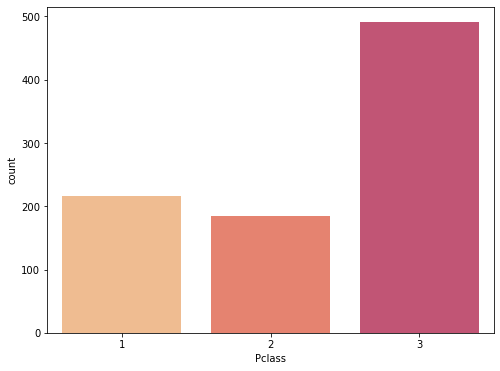

In [12]:
plt.figure(figsize = (8, 6))
sns.countplot(x = "Pclass", data = train)
plt.show()

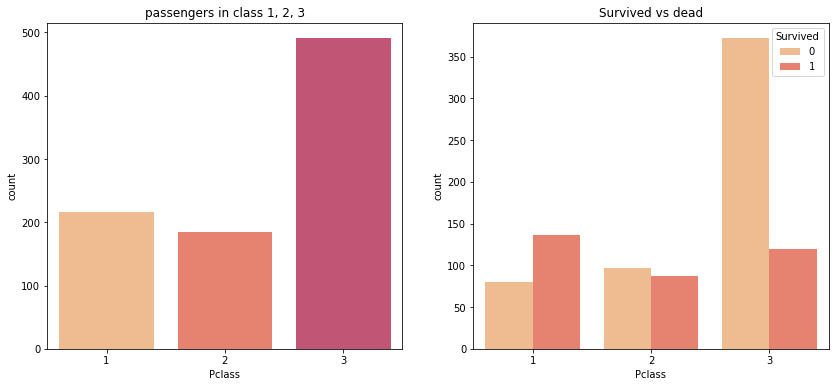

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Pclass", data = train, ax = ax[0])
ax[0].set_title("passengers in class 1, 2, 3")
sns.countplot(x = "Pclass", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Survived vs dead")
plt.show()
                       

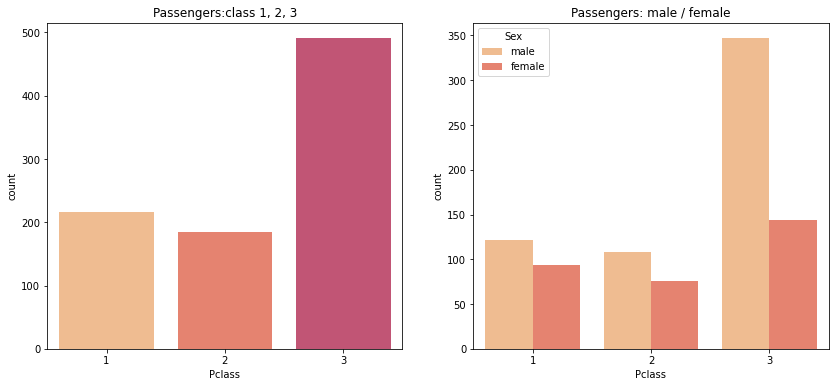

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "Pclass", data = train, ax = ax[0])
ax[0].set_title("Passengers:class 1, 2, 3")
sns.countplot(x = "Pclass",hue = "Sex", data = train, ax = ax[1])
ax[1].set_title("Passengers: male / female")
plt.show()

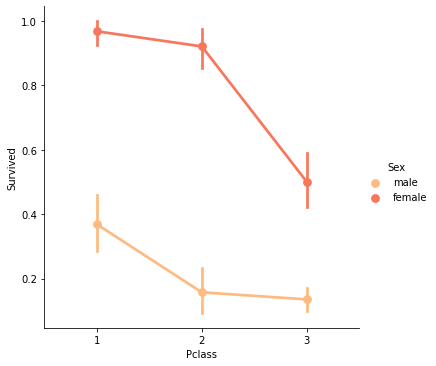

In [15]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", data = train, kind = "point")
plt.show()

In [16]:
pd.crosstab([train["Pclass"], train["Survived"]], train["Sex"], margins = True).style.background_gradient(cmap = "magma_r")

## Age

In [17]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
median_age = train['Age'].median()
train['Age'].fillna(value = median_age, inplace = True)

In [19]:
train['new_age'] = train['Age'].apply(lambda x : int(x/10))
train['new_age'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8], dtype=int64)

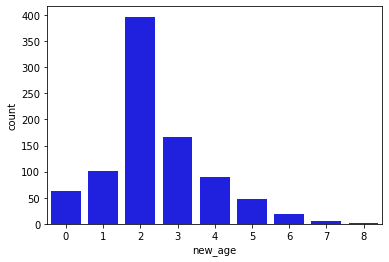

In [20]:
sns.countplot(x = 'new_age', data = train, color = "blue")
plt.show()

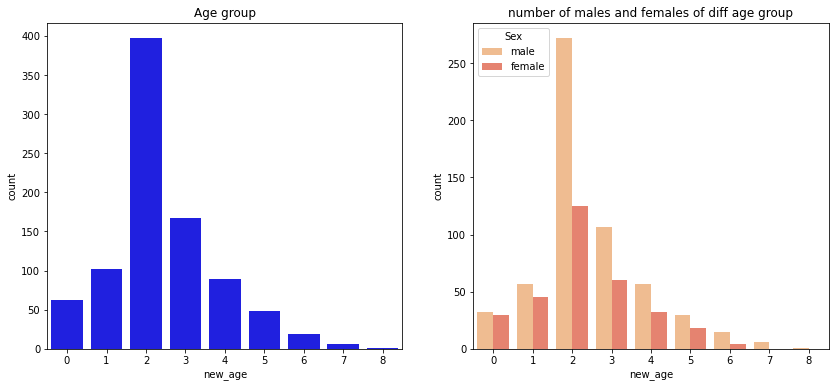

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "new_age", data = train, color = "blue", ax = ax[0])
ax[0].set_title("Age group")
sns.countplot(x = "new_age",hue = "Sex", data = train, ax = ax[1])
ax[1].set_title("number of males and females of diff age group")
plt.show()

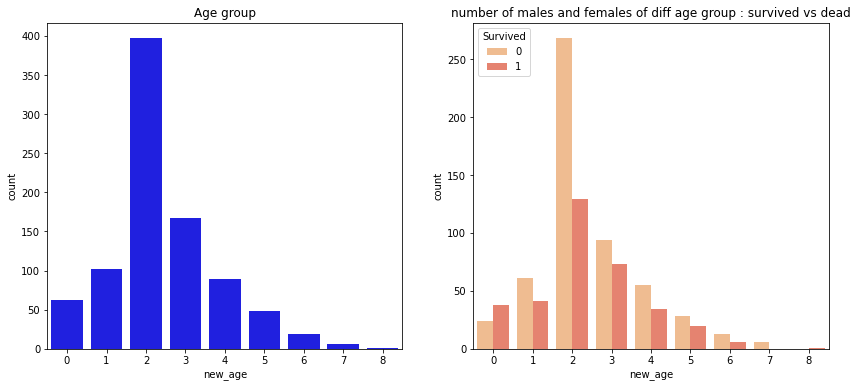

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(x = "new_age", data = train, color = "blue", ax = ax[0])
ax[0].set_title("Age group")
sns.countplot(x = "new_age",hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("number of males and females of diff age group : survived vs dead")
plt.show()

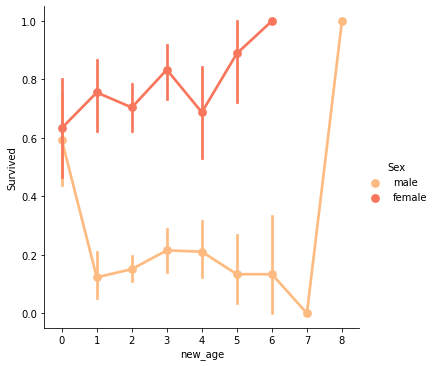

In [23]:
sns.catplot(x = "new_age", y = "Survived", hue = "Sex", data = train, kind = "point")
plt.show()